## About

In this notebook we prepare a simple solution for the [kaggle challenge on higgs.](https://inclass.kaggle.com/c/mlhep-2016-higgs-detection)

In [106]:
!pip install --upgrade sklearn 

    100% |################################| 17.6MB 47kB/s 
  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /root/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn
  Found existing installation: scikit-learn 0.16.1
    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling scikit-learn-0.16.1:
      Successfully uninstalled scikit-learn-0.16.1
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import pandas
import numpy

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

In [3]:
import sklearn
print sklearn.__version__

0.17.1


In [4]:
from sklearn.feature_selection import SelectFromModel

### Download data

In [5]:
!cd datasets; wget -O public_train_10000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_10000.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_train_10000.root' already there; not retrieving.


In [6]:
# you can download training sample with 100000 available events
# uncomment the below row
# !cd datasets; wget -O public_train_100000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_100000.root

In [7]:
!cd datasets; wget -O public_test.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_test.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_test.root' already there; not retrieving.


### Read the smallest part of training file and test file

In [8]:
import root_numpy
data = pandas.DataFrame(root_numpy.root2array('datasets/public_train_10000.root'))
test = pandas.DataFrame(root_numpy.root2array('datasets/public_test.root'))

In [9]:
def DistanceBetweenObjets(eta1, phi1, eta2, phi2):
    return numpy.sqrt((eta1 - eta2)**2+(phi1-phi2)**2)

In [10]:
from sklearn.feature_selection import from_model

In [11]:
phis = [data.lepton_phi,data.mem_phi,data.jet1_phi,data.jet2_phi,data.jet3_phi,data.jet4_phi]
etas = [data.lepton_eta,data.lepton_eta,data.jet1_eta,data.jet2_eta,data.jet3_eta,data.jet4_eta]
phis_t = [test.lepton_phi,test.mem_phi,test.jet1_phi,test.jet2_phi,test.jet3_phi,test.jet4_phi]
etas_t = [test.lepton_eta,test.lepton_eta,test.jet1_eta,test.jet2_eta,test.jet3_eta,test.jet4_eta]
name = ["l","nu","j1","j2","j3","j4"]
for i in range(len(phis)-1):
    for j in range(len(phis)-1):
        if j > i:
            print i
            n = "d_" + name[i] + "_" + name[j]
            print name
            data[n] = DistanceBetweenObjets(phis[i],etas[i],phis[j],phis[j])            
            test[n] = DistanceBetweenObjets(phis_t[i],etas_t[i],phis_t[j],phis_t[j])

0
['l', 'nu', 'j1', 'j2', 'j3', 'j4']
0
['l', 'nu', 'j1', 'j2', 'j3', 'j4']
0
['l', 'nu', 'j1', 'j2', 'j3', 'j4']
0
['l', 'nu', 'j1', 'j2', 'j3', 'j4']
1
['l', 'nu', 'j1', 'j2', 'j3', 'j4']
1
['l', 'nu', 'j1', 'j2', 'j3', 'j4']
1
['l', 'nu', 'j1', 'j2', 'j3', 'j4']
2
['l', 'nu', 'j1', 'j2', 'j3', 'j4']
2
['l', 'nu', 'j1', 'j2', 'j3', 'j4']
3
['l', 'nu', 'j1', 'j2', 'j3', 'j4']


In [16]:
data.head()

,event_id,target,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,...,d_l_nu,d_l_j1,d_l_j2,d_l_j3,d_nu_j1,d_nu_j2,d_nu_j3,d_j1_j2,d_j1_j3,d_j2_j3
0,1000001,1,34.750568,0.787025,1.898891,20.862434,-2.622998,44.814148,-0.168171,2.631595,...,5.663546,1.984764,2.969750,5.993567,5.568948,2.434228,3.653138,3.353251,6.113855,3.465572
1,1000002,1,54.250927,-1.057915,2.310697,51.167873,2.545749,31.039040,-2.220276,-0.737298,...,3.611322,3.064811,2.686940,4.008531,3.298665,2.912043,3.980408,2.026281,6.289264,5.097277
2,1000003,1,47.746025,-0.783184,2.660325,68.165527,-1.700790,36.945312,-1.151738,-0.626912,...,4.456605,3.290949,2.496093,2.955559,1.085190,3.690445,4.803049,3.156112,4.276414,2.466473
3,1000004,0,45.950066,1.613817,0.964722,39.302082,-0.075989,84.307426,0.465748,2.287783,...,1.984572,1.484830,3.695137,3.060701,2.457977,3.164853,2.583162,4.003244,3.403135,1.368662
4,1000005,0,44.409187,-0.228907,-1.837974,49.886654,0.156533,32.852112,2.561646,2.641460,...,2.031408,5.320181,2.395875,1.159801,3.796560,3.529343,1.657811,7.249352,5.365879,1.364319


In [17]:
test.head()

,event_id,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,d_l_nu,d_l_j1,d_l_j2,d_l_j3,d_nu_j1,d_nu_j2,d_nu_j3,d_j1_j2,d_j1_j3,d_j2_j3
0,1,58.814354,-1.223199,1.290717,26.435696,2.608772,68.413330,0.639561,-1.226549,1.000008,...,4.052317,2.517268,4.174624,2.083416,3.835322,3.929047,3.378880,4.440634,1.459562,4.005969
1,2,21.390781,-0.468277,-1.371404,57.185963,1.214130,118.127953,-0.113784,-2.182008,0.000000,...,3.084718,1.895772,1.750256,5.388182,3.804028,1.206114,3.717447,2.439164,5.858205,4.742207
2,3,58.570217,1.443092,0.105191,54.450954,-2.354347,26.443583,-1.911658,1.337635,0.000000,...,4.524364,1.236947,4.264271,1.045841,3.693488,3.614015,3.461875,3.512868,3.011320,3.947097
3,4,70.469345,0.166176,-1.962429,38.138966,2.564890,42.678413,-1.256608,-0.276156,2.000000,...,5.123519,1.743323,1.533777,4.253187,2.875273,3.365086,1.865505,0.701743,3.854499,3.091094
4,5,113.456779,0.232503,2.941150,64.401146,1.125812,164.289139,-0.735258,-0.590741,1.999937,...,2.023229,3.626567,2.789613,5.633085,1.903755,3.371530,4.063238,5.210928,2.118209,5.351792


### Define training features

Exclude `event_id`, `target` from the features set

In [18]:
features = list(set(data.columns) - {'event_id', 'target'})
features

['jet3_pt',
 'jet3_eta',
 'd_nu_j1',
 'd_nu_j3',
 'm_jjj',
 'mem_phi',
 'jet1_pt',
 'jet4_phi',
 'jet1_phi',
 'jet2_eta',
 'd_j2_j3',
 'jet3_btag',
 'm_jlv',
 'm_wbb',
 'jet4_pt',
 'jet4_btag',
 'jet2_pt',
 'jet1_btag',
 'm_jj',
 'd_l_j1',
 'd_l_j2',
 'd_l_j3',
 'm_wwbb',
 'jet2_phi',
 'lepton_phi',
 'm_bb',
 'm_lv',
 'jet4_eta',
 'jet2_btag',
 'lepton_pt',
 'd_j1_j3',
 'mem_pt',
 'lepton_eta',
 'jet3_phi',
 'd_j1_j2',
 'd_nu_j2',
 'jet1_eta',
 'd_l_nu']

### Prepare high-level features for training

In [32]:
high_level_features = ['jet3_pt',
 'jet3_eta',
 'm_jjj',
 'mem_phi',
 'jet1_pt',
 'jet4_phi',
 'jet1_phi',
 'jet2_eta',
 'jet3_btag',
 'm_jlv',
 'm_wbb',
 'jet4_pt',
 'jet4_btag',
 'jet2_pt',
 'jet1_btag',
 'm_jj',
 'm_wwbb',
 'jet2_phi',
 'lepton_phi',
 'm_bb',
 'm_lv',
 'jet4_eta',
 'jet2_btag',
 'lepton_pt',
 'mem_pt',
 'lepton_eta',
 'jet3_phi',
 'jet1_eta']

### Plot histograms for each high-level feature

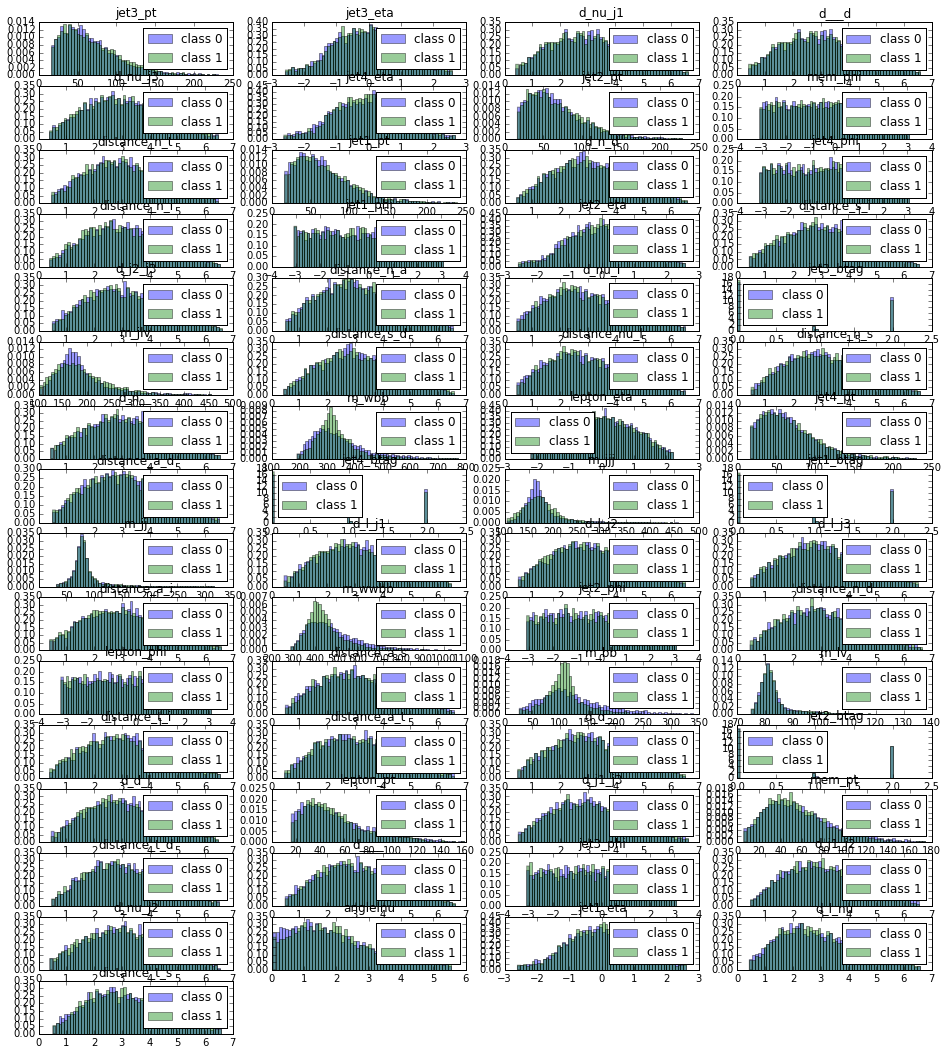

In [86]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(features):
    # add sub plot on our figure
    plt.subplot(len(features) // 5 + 10, 4, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    plt.title(feature)

### Divide training data into 2 parts 
`train_test_split` function is used to divide into 2 parts to preserve quality overestimating.

In [87]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.66)

### Simple knn from `sklearn` training

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(training_data[features], training_data.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=50, p=2, weights='uniform')

In [94]:
# predict validation sample (probability for each event)
proba = knn.predict_proba(validation_data[features])

In [95]:
proba

array([[ 0.52,  0.48],
       [ 0.4 ,  0.6 ],
       [ 0.52,  0.48],
       ..., 
       [ 0.74,  0.26],
       [ 0.44,  0.56],
       [ 0.64,  0.36]])

### Compute quality (ROC AUC) on the validation set (to prevent overestimating quality)

In [96]:
# take probability to be 1 class to compute ROC AUC
roc_auc_score(validation_data.target, proba[:, 1])

0.74848647352835618

## Prepare submission to kaggle

In [45]:
# predict test sample
kaggle_proba = knn.predict_proba(test[high_level_features])[:, 1]
kaggle_ids = test.event_id

In [46]:
from IPython.display import FileLink
def create_solution(ids, proba, filename='baseline.csv'):
    """saves predictions to file and provides a link for downloading """
    pandas.DataFrame({'event_id': ids, 'prediction': proba}).to_csv('datasets/{}'.format(filename), index=False)
    return FileLink('datasets/{}'.format(filename))
    
create_solution(kaggle_ids, kaggle_proba)

/notebooks/higgs_kaggle/datasets/baseline.csv